In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [2]:
#Create a Regression dataset
X,y = make_regression(n_samples=10000,n_features=20,n_informative=20,noise=10,random_state=1)

#Normalisation
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std

In [3]:
# Add a column of 1's for vectorization
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [37]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/m

def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

#Batch Gradient descent
def gradient_descent(X,y,lr = 0.01,max_iters=100):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        #Gradient Descent
        grad = gradient(X,y,theta)
        theta = theta - lr*grad

    return theta,error_list

In [38]:
theta,error_list = gradient_descent(X,y)

## Mini Batch Gradient Descent


In [42]:
def miniBatchGradientDescent(X,y,batch_size=200,lr = 0.01, max_iters = 50):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    
    #joining x,y together to form data
    data = np.hstack((X,y.reshape(-1,1)))
    m = data.shape[0]
    #total batches
    total_batches = m//batch_size

    for i in range(max_iters):
        
        #mini batch gd

        #shuffle the data
        np.random.shuffle(data)

        for batch in range(total_batches):
            
            batch_data = data[batch*batch_size : (batch+1)*batch_size]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
            batch_gradient = gradient(x_batch,y_batch,theta)
            theta = theta-lr*batch_gradient        

    return theta,error_list

In [43]:
theta2,error_list2 = miniBatchGradientDescent(X,y)


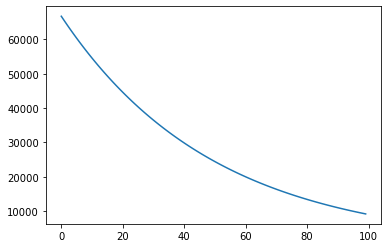

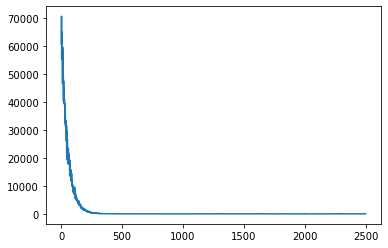

In [44]:

plt.plot(error_list)
plt.show()

plt.plot(error_list2)
plt.show()